In [0]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Un ingeniero desea producir a escala industrial un tipo de gomina. En su planta de producción encuentra que la temperatura, la tasa de agitación y la presión son las variables que mejor explican la viscosidad de la gomina. Interesa maximizar dicha viscosidad. En las siguientes tablas se muestra la descripción del proceso:


En primer lugar realizamos un diseño factorial para determinar cuales son los datos que deberiamos tener

In [0]:
data_product = np.array(list(itertools.product([200,175,150],
                                               [10.0,7.5,5.0],
                                               [25,20,15]
                                              )))

In [4]:
data_product

array([[200. ,  10. ,  25. ],
       [200. ,  10. ,  20. ],
       [200. ,  10. ,  15. ],
       [200. ,   7.5,  25. ],
       [200. ,   7.5,  20. ],
       [200. ,   7.5,  15. ],
       [200. ,   5. ,  25. ],
       [200. ,   5. ,  20. ],
       [200. ,   5. ,  15. ],
       [175. ,  10. ,  25. ],
       [175. ,  10. ,  20. ],
       [175. ,  10. ,  15. ],
       [175. ,   7.5,  25. ],
       [175. ,   7.5,  20. ],
       [175. ,   7.5,  15. ],
       [175. ,   5. ,  25. ],
       [175. ,   5. ,  20. ],
       [175. ,   5. ,  15. ],
       [150. ,  10. ,  25. ],
       [150. ,  10. ,  20. ],
       [150. ,  10. ,  15. ],
       [150. ,   7.5,  25. ],
       [150. ,   7.5,  20. ],
       [150. ,   7.5,  15. ],
       [150. ,   5. ,  25. ],
       [150. ,   5. ,  20. ],
       [150. ,   5. ,  15. ]])

In [5]:
data_product.shape

(27, 3)

Al tener tres parametros cada uno con tres niveles se deben obtener $3^3 = 27$ corridas en las experimentaciones

In [0]:
titles = ['corrida','temperatura','tasa_agitacion','presion','viscosidad']
data = np.array([[1,150,5,20,537.66],
[2,200,5,20,582.66],
[3,150,10,20,598.66],
[4,200,10,20,565.66],
[5,150,7.5,15,647.66],
[6,200,7.5,15,460.66],
[7,150,7.5,25,352.66],
[8,200,7.5,25,602.66],
[9,175,5,15,597.66],
[10,175,10,15,650.66],
[11,175,5,25,534.66],
[12,175,10,25,658.66],
[13,175,7.5,20,654.66],
[14,175,7.5,20,601.66],
[15,175,7.5,20,622.66]])

In [14]:
# Cargamos los datos entregados
df = pd.DataFrame(data, columns = titles)
df.head()

,corrida,temperatura,tasa_agitacion,presion,viscosidad
0,1.0,150.0,5.0,20.0,537.66
1,2.0,200.0,5.0,20.0,582.66
2,3.0,150.0,10.0,20.0,598.66
3,4.0,200.0,10.0,20.0,565.66
4,5.0,150.0,7.5,15.0,647.66


Los datos entregados en el problema estában organizados de modo que por cada nivel de se reemplazan los valores con -1, 0 y 1; para poder hallar mas adelante un modelo certero debemos trabajarlos con los datos reales, los cuales toman valores contínuos y no discretos como están factorizados

**a.** Para este diseño se utilizó una metodología de Box and Behnken: utilizando R proponga la matriz del diseño e incluya la variable de respuesta viscosidad con los valores reales

**Solución**

Mostramos los valores ordenados entre sí por los niveles de las caracteristicas

In [15]:
df.sort_values(['temperatura','tasa_agitacion','presion'])

,corrida,temperatura,tasa_agitacion,presion,viscosidad
0,1.0,150.0,5.0,20.0,537.66
4,5.0,150.0,7.5,15.0,647.66
6,7.0,150.0,7.5,25.0,352.66
2,3.0,150.0,10.0,20.0,598.66
8,9.0,175.0,5.0,15.0,597.66
10,11.0,175.0,5.0,25.0,534.66
12,13.0,175.0,7.5,20.0,654.66
13,14.0,175.0,7.5,20.0,601.66
14,15.0,175.0,7.5,20.0,622.66
9,10.0,175.0,10.0,15.0,650.66


In [16]:
df.shape

(15, 5)

Con las medidas de éste dataframe de entrada podemos decir que faltan corridas por evaluar, ya que tenemos sólo 15 cuando deberíamos tener 27

--------------------------------------------------------------

**b.** Genere un modelo de primer y de segundo orden: ¿Cuál modelo utilizaría para concluir la optimización y por qué? Genere la gráfica X y Y de predichos y experimentales.

In [0]:
# Generamos un modelo de primer order usando StatsModels
model_sm = sm.OLS(df['viscosidad'].values, df.drop(['viscosidad','corrida'],axis = 1), hasconst=True).fit()

In [18]:
model_sm.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.193
Model:                            OLS   Adj. R-squared:                 -0.392
Method:                 Least Squares   F-statistic:                   -0.9727
Date:                Mon, 05 Nov 2018   Prob (F-statistic):               1.00
Time:                        22:02:29   Log-Likelihood:                -88.240
No. Observations:                  15   AIC:                             182.5
Df Residuals:                      12   BIC:                             184.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
temperatura        2.3789      0.803      2.961      0.012       0.629       4.129
tasa_agitacion    19.6383     12.871      1.526      0.153      -8.404      47.681
presion            0.5255      6.082      0.086      0.933     -12.726      13.777
==============================================================================
Omnibus:                        2.827   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                1.826
Skew:                          -0.845   Prob(JB):                        0.401
Kurtosis:                       2.745   Cond. No.                         91.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#Probamos nuestro modelo con los valores del primer registro de nuestro dataset
model_sm.predict([150, 5, 20])

array([465.54078712])

In [20]:
#Generamos un modelo usando LinearRegression de sklearn
model_skl = LinearRegression()
model_skl.fit(df.drop(['viscosidad','corrida'], axis=1),df['viscosidad'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
#Probamos nuestro modelo con los valores del primer registro de nuestro dataset
model_skl.predict([[150, 5, 20]])

array([540.92666667])

In [22]:
#Mostramos los coeficientes y el intercepto del modelo generado
print(model_skl.coef_)
print(model_skl.intercept_)

[ 0.375 11.05  -5.2  ]
533.4266666666666


In [0]:
#Tomamos los valores medidos entregados en el dataset
medido = df['viscosidad'].values

In [0]:
#Tomamos un array con las caracteristicas
x_data = df.drop(['viscosidad','corrida'], axis=1).values

In [0]:
#Tomamos los valores predichos por nuestro primer modelo
predicho_model_sm = np.array([model_sm.predict([e[0],e[1],e[2]]) for e in x_data])

In [0]:
#Tomamos los valores predichos por nuestro segundo modelo
predicho_model_skl = np.array([model_skl.predict([[e[0],e[1],e[2]]]) for e in x_data])

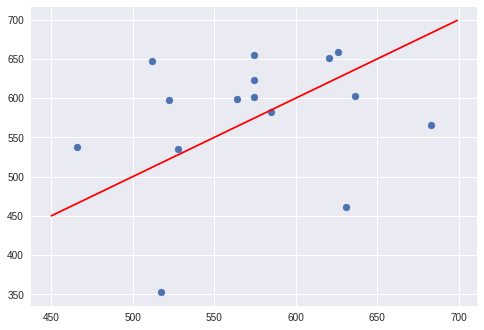

In [27]:
#Generamos una gráfica para mirar que tan dispersos estan los datos medidos vs los predichos con el primer modelo
plt.scatter(predicho_model_sm,medido)
plt.plot(list(range(450,700)),list(range(450,700)), color = 'red')

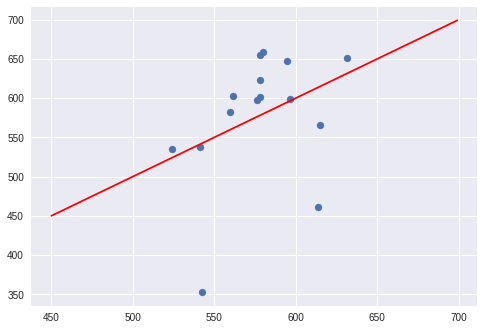

In [37]:
#Generamos una gráfica para mirar que tan dispersos estan los datos medidos vs los predichos con el segundo modelo
plt.scatter(predicho_model_skl, medido)
plt.plot(list(range(450,700)),list(range(450,700)), color = 'red')

In [44]:

from sklearn.metrics import r2_score
# Explained variance score: 1 is perfect prediction
print('r_2 score: %.2f' % r2_score(df['viscosidad'].values, predicho_model_skl))

r_2 score: 0.13


El R cuadrádo de este modelo es de 0.13, es decir, este modelo explica el 13% de los datos, diferente al valor negativo de R cuadrádo que teniamos en el primer modelo.

Se puede notar una menor dispersion de los datos cuando usamos el modelos generado por sklearn.LinearRegression

--------

**c.** ¿Cuáles son las condiciones de operación óptimas si se desea obtener una viscosidad de 600?

**d.** ¿Cuáles son los factores que afectan de manera significativa la viscosidad?, determine la tabla ANOVA y concluya cuál considera usted que es el cuello de botella del proceso

El modelo generado por sklearn puede obtenerse también usando statsmodels, en este caso debemos usar formulas para obtenerlo; mecesitamos generar este modelo para poder generar la tabla ANOVA necesaria para este ejercicio

In [71]:
#Creamos un modelo usando formulas
model_smf = smf.ols('viscosidad ~ temperatura + tasa_agitacion + presion',df.drop('corrida',axis =1)).fit()
model_smf.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             viscosidad   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                 -0.109
Method:                 Least Squares   F-statistic:                    0.5429
Date:                Mon, 05 Nov 2018   Prob (F-statistic):              0.663
Time:                        23:09:21   Log-Likelihood:                -85.878
No. Observations:                  15   AIC:                             179.8
Df Residuals:                      11   BIC:                             182.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        533.4267    264.340      2.018      0.069     -48.382    1115.235
temperatura        0.3750      1.225      0.306      0.765      -2.321       3.071
tasa_agitacion    11.0500     12.247      0.902      0.386     -15.907      38.007
presion           -5.2000      6.124     -0.849      0.414     -18.678       8.278
==============================================================================
Omnibus:                       10.389   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.693
Skew:                          -1.507   Prob(JB):                       0.0352
Kurtosis:                       4.272   Cond. No.                     2.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:

table = sm.stats.anova_lm(model_smf, typ=2)
table

,sum_sq,df,F,PR(>F)
temperatura,703.125000,1.0,0.093749,0.765181
tasa_agitacion,6105.125000,1.0,0.814010,0.386267
presion,5408.000000,1.0,0.721061,0.413895
Residual,82500.683333,11.0,NaN,NaN


Normalmente evaluamos primero si el valor de P es menor a la significancia, en este caso todos los valores de P son mayores a la significancia; esto quiere decir que en realidad todas las variables son poco significativas, esto puede deberse a la falta de información ya que sólo tenemos 15 corridas cuando se esperan 27.

Sin embargo podemos decir que la variable que mas afecta la salida es la tasa de agitacion, porque ésta posee un valor de P menor que las demás; la variable que menos afecta la salida es la temperatura



**e.** Construya las superficies de respuesta para la interacción de todos los factores ¿Cuál sería el tratamiento que maximiza la viscosidad?